# Installing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as vifm

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import scipy.stats as st
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [2]:
# Reading the Datasets
data=pd.read_csv('train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.shape

(1460, 81)

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
data.describe(include ='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [7]:
# From the descrption given, we can see that 'MSSubClass', 'OverallQual', 'OverallCond' are categorical variables 
# So converting them to object datatype

data['MSSubClass']= data['MSSubClass'].astype('O')
data['OverallQual']= data['OverallQual'].astype('O')
data['OverallCond']= data['OverallCond'].astype('O')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [8]:
# Analyzing the numerical features

numerical_features = data.select_dtypes(include = np.number)
print(numerical_features.shape)
numerical_features.columns

(1460, 35)


Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
# Since 'Id' column is unique, it does not contribute in prediction so let us drop 
data = data.drop('Id', axis=1)

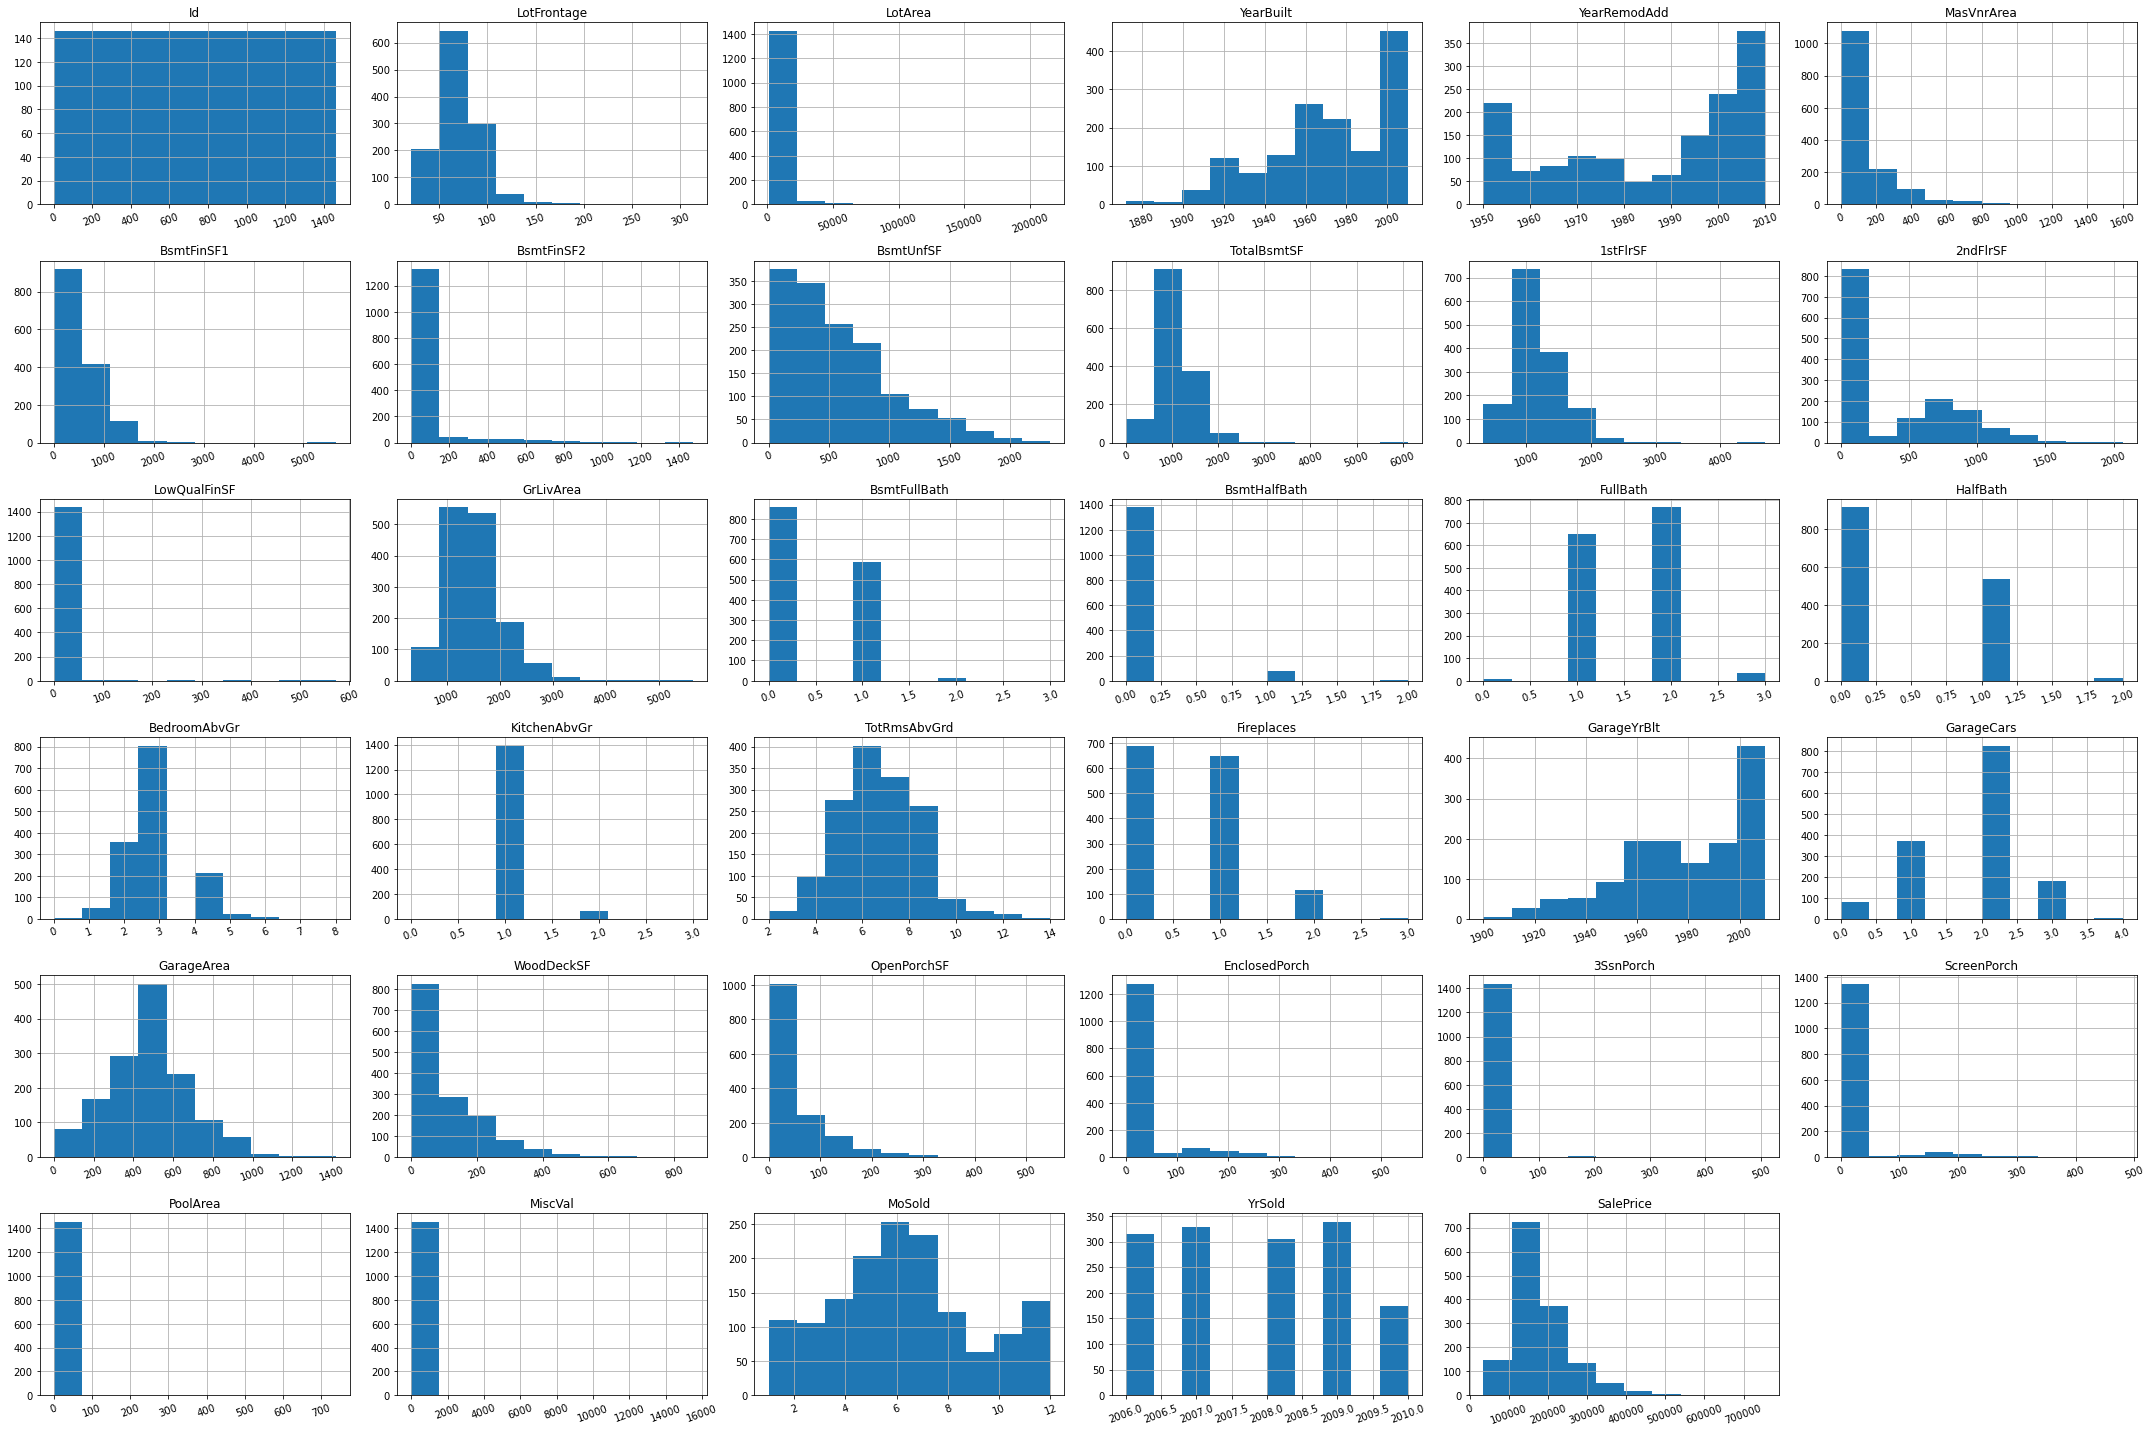

In [10]:
plt.rcParams['figure.figsize']=[30,20]
numerical_features.hist(xrot=20)
plt.tight_layout()
plt.show()

In [11]:
# Analyzing Categorical features

categorical_features = []
for column in data:
    if is_string_dtype(data[column]):
        categorical_features.append(column)
print(len(categorical_features))
categorical_features

46


['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

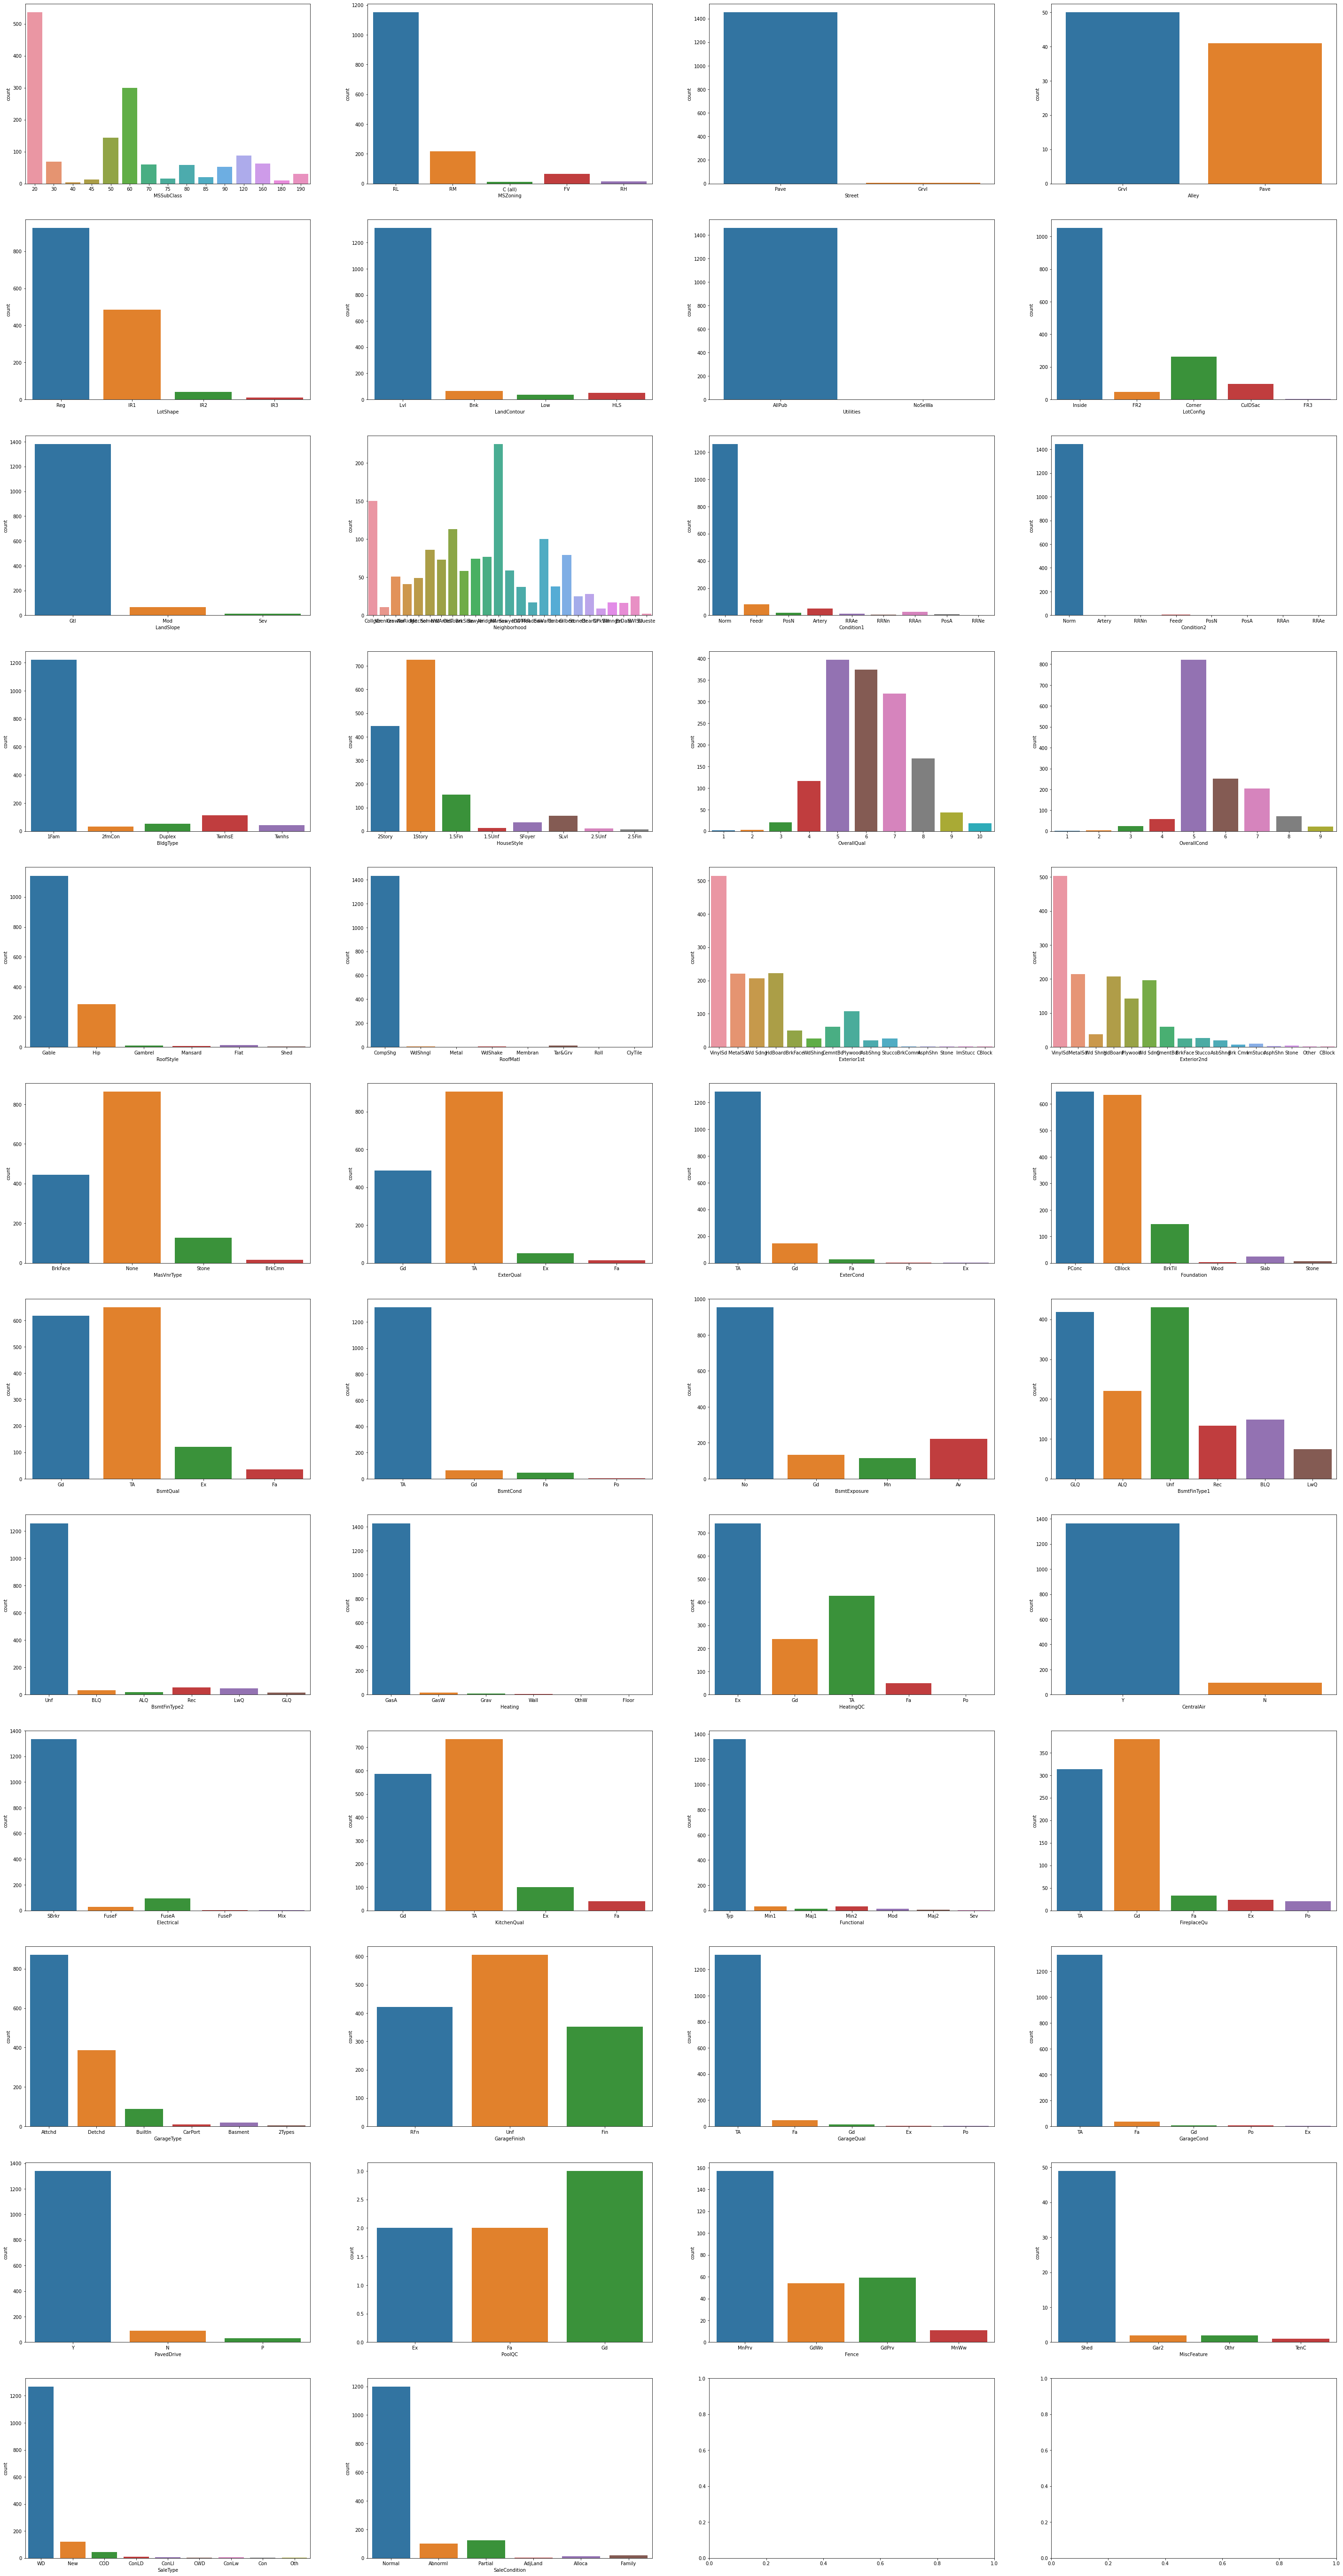

In [12]:
fig, ax=plt.subplots(nrows=12, ncols=4, figsize=(50,100))
for variable,subplot in zip(categorical_features, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
plt.show()

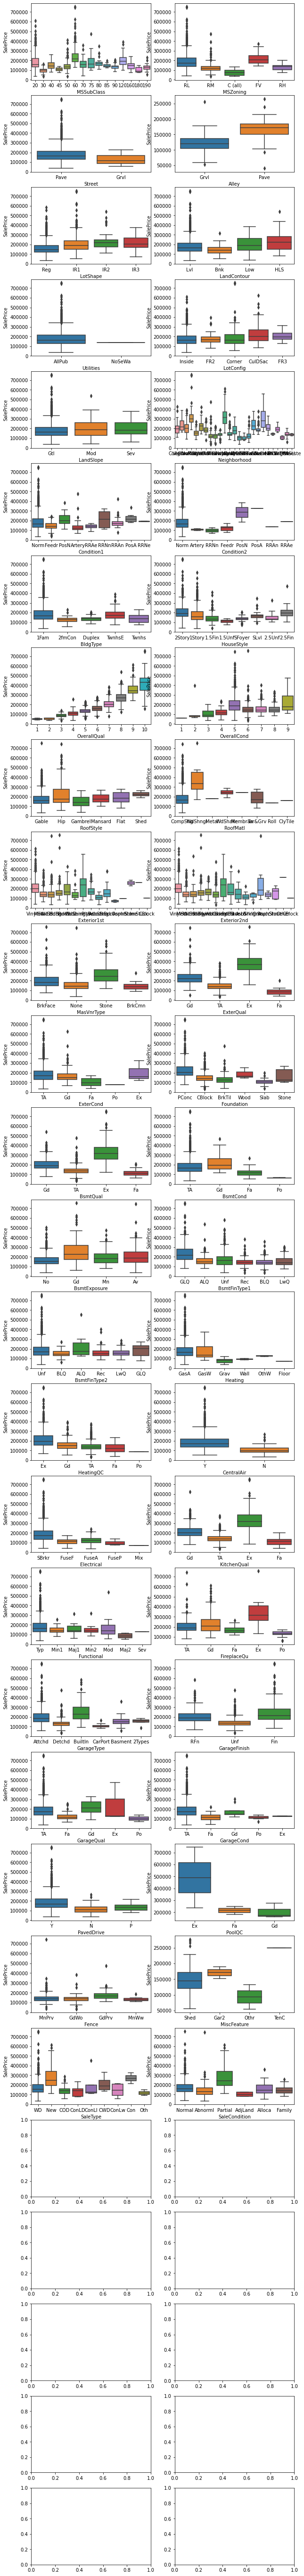

In [13]:
fig, ax= plt.subplots(nrows=28, ncols=2,figsize=(10,100))

for variable, subplot in zip(categorical_features, ax.flatten()):
    sns.boxplot(x = variable, y = 'SalePrice', data = data, ax = subplot)
plt.show()

Text(0.5, 1.0, 'Sale Price vs Overall Quallity')

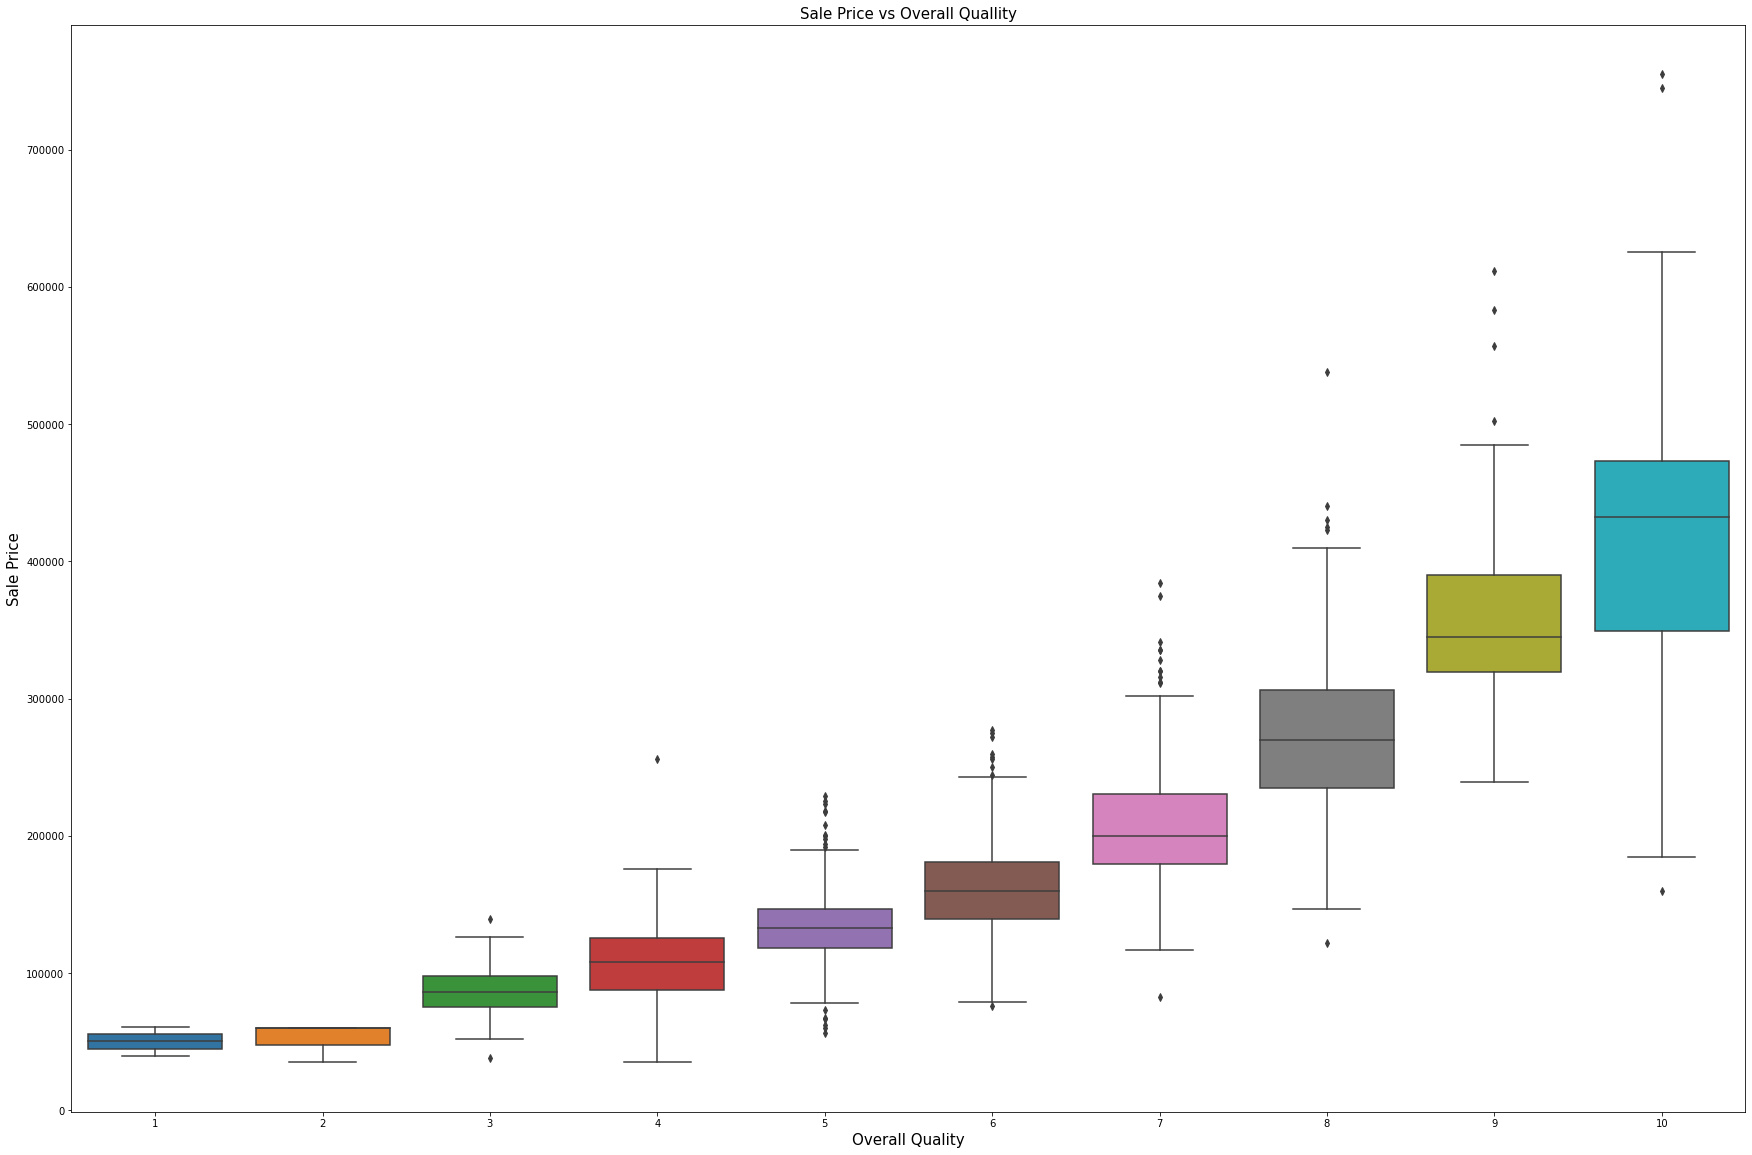

In [14]:
# Box plot for displying the relation b/w SalePrice ad Overall Quality

sns.boxplot(x='OverallQual', y='SalePrice' , data=data)
plt.xlabel('Overall Quality', fontsize=15)
plt.ylabel('Sale Price', fontsize=15)
plt.title('Sale Price vs Overall Quallity', fontsize=15)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


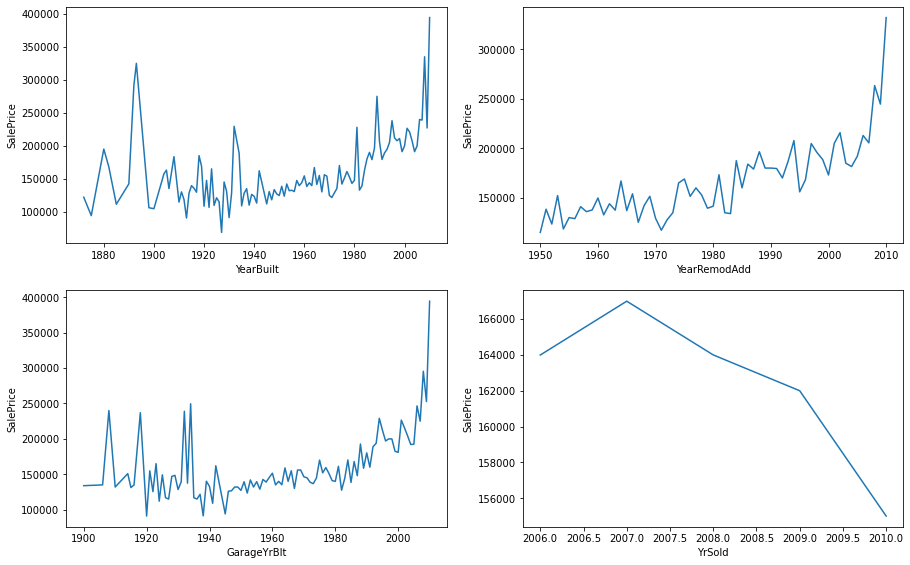

In [15]:
# Since we have features containing year in it, We'll look if there is some relation with the dependent variable

year_feature = [col for col in numerical_features if 'Yr' in col or 'Year' in col]
print(year_feature)
                
plt.figure(figsize=(15,20))
for i ,feature in enumerate(year_feature, 1):
    plt.subplot(4,2,i)
    data.groupby(feature)['SalePrice'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
plt.show()

In [16]:
# Missing values

# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False': sorts values in the descending order

Total_nulls = data.isnull().sum().sort_values(ascending = False) 
Total_nulls

Percent_nulls = (data.isnull().sum() *100 / data.isnull().count())
Percent_nulls = Percent_nulls.sort_values(ascending=False)

missing_values= pd.concat([Total_nulls,Percent_nulls], axis=1, keys=['Total_nulls','Percent_nulls'])
missing_values

missing_values['Datatype'] = data[missing_values.index].dtypes
missing_values

,Total_nulls,Percent_nulls,Datatype
PoolQC,1453,99.520548,object
MiscFeature,1406,96.301370,object
Alley,1369,93.767123,object
Fence,1179,80.753425,object
FireplaceQu,690,47.260274,object
LotFrontage,259,17.739726,float64
GarageYrBlt,81,5.547945,float64
GarageCond,81,5.547945,object
GarageType,81,5.547945,object
GarageFinish,81,5.547945,object


In [17]:
# filter out the categorical variables and consider only the numeric variables with missing values

num_missing_values = missing_values[(missing_values['Total_nulls'] > 0) & (missing_values['Datatype'] != 'object')]
num_missing_values

,Total_nulls,Percent_nulls,Datatype
LotFrontage,259,17.739726,float64
GarageYrBlt,81,5.547945,float64
MasVnrArea,8,0.547945,float64


For the numerical variables, we can replace the missing values by their mean, median or mode as per the requirement.

The variable 'LotFrontage' is right skewed and thus we will fill the missing values with its median value

In [18]:
# use the function fillna() to fill the missing values
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())

We will replace the missing values in the numeric variable GarageYrBlt by 0. The missing values in this variable indicates that there are 81 observations for which garage facility is not available.¶

In [19]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

#### The variable 'MasVnrArea' is positively skewed and thus we will fill the missing values with its median value

In [20]:
print(data['MasVnrArea'].mean())
print(data['MasVnrArea'].median())

103.68526170798899
0.0


Since the median value is 0, we'll look into 'MasVnrArea' corresponding to 'MSSubClass'

In [21]:
data.groupby(['MSSubClass'])['MasVnrArea'].median()

MSSubClass
20      0.0
30      0.0
40      0.0
45      0.0
50      0.0
60     99.5
70      0.0
75      0.0
80     81.0
85      0.0
90      0.0
120    52.5
160    76.0
180     0.0
190     0.0
Name: MasVnrArea, dtype: float64

In [22]:
print(data.loc[data.MSSubClass ==60, 'MasVnrArea'].count())
print(data.loc[data.MSSubClass ==80, 'MasVnrArea'].count())
print(data.loc[data.MSSubClass ==120, 'MasVnrArea'].count())
print(data.loc[data.MSSubClass ==160, 'MasVnrArea'].count())

296
58
86
63


In [23]:
data.loc[data.MSSubClass==60, 'MasVnrArea'] =data.loc[data.MSSubClass==60, 'MasVnrArea'].fillna(data.loc[data.MSSubClass ==60].median())
data.loc[data.MSSubClass==80, 'MasVnrArea'] =data.loc[data.MSSubClass==80, 'MasVnrArea'].fillna(data.loc[data.MSSubClass ==80].median())
data.loc[data.MSSubClass==120, 'MasVnrArea'] =data.loc[data.MSSubClass==120, 'MasVnrArea'].fillna(data.loc[data.MSSubClass ==120].median())
data.loc[data.MSSubClass==160, 'MasVnrArea'] =data.loc[data.MSSubClass==160, 'MasVnrArea'].fillna(data.loc[data.MSSubClass ==160].median())
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].median())

**Handling the missing values for categorical variables**

In [24]:
cat_missing_values = missing_values[(missing_values['Total_nulls'] > 0) & (missing_values['Datatype'] == 'object')]
cat_missing_values

,Total_nulls,Percent_nulls,Datatype
PoolQC,1453,99.520548,object
MiscFeature,1406,96.301370,object
Alley,1369,93.767123,object
Fence,1179,80.753425,object
FireplaceQu,690,47.260274,object
GarageCond,81,5.547945,object
GarageType,81,5.547945,object
GarageFinish,81,5.547945,object
GarageQual,81,5.547945,object
BsmtExposure,38,2.602740,object


In [25]:
data['MiscFeature']=data['MiscFeature'].fillna('None')
data['Alley']= data['Alley'].fillna('No Alley Access')
data['Fence']=data['Fence'].fillna('No Fence')
data['FireplaceQu']= data['FireplaceQu'].fillna('No Fireplace')

for col in ['GarageCond','GarageType','GarageFinish','GarageQual']:
    data[col].fillna('No Garage',inplace =True)
    
for col in ['BsmtExposure','BsmtFinType2','BsmtCond','BsmtCond','BsmtCond']:
    data[col].fillna('No Basement')

data['MasVnrType']= data['MasVnrType'].fillna('None')
data['Electrical']=data['Electrical'].fillna('None')

**Correlation Matrix & Heatmap**

In [26]:
cormat = data.corr()
cormat

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.304522,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.099196,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,0.304522,1.000000,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.072599,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
YearBuilt,0.116685,0.014228,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.272029,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.083348,0.013788,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.146357,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.178469,0.103321,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.132696,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,0.214367,0.214103,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.115843,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.042463,0.111170,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,0.035070,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.124098,-0.002618,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.042720,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,0.363472,0.260833,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.176359,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.413773,0.299475,0.281986,0.240379,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.166642,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852


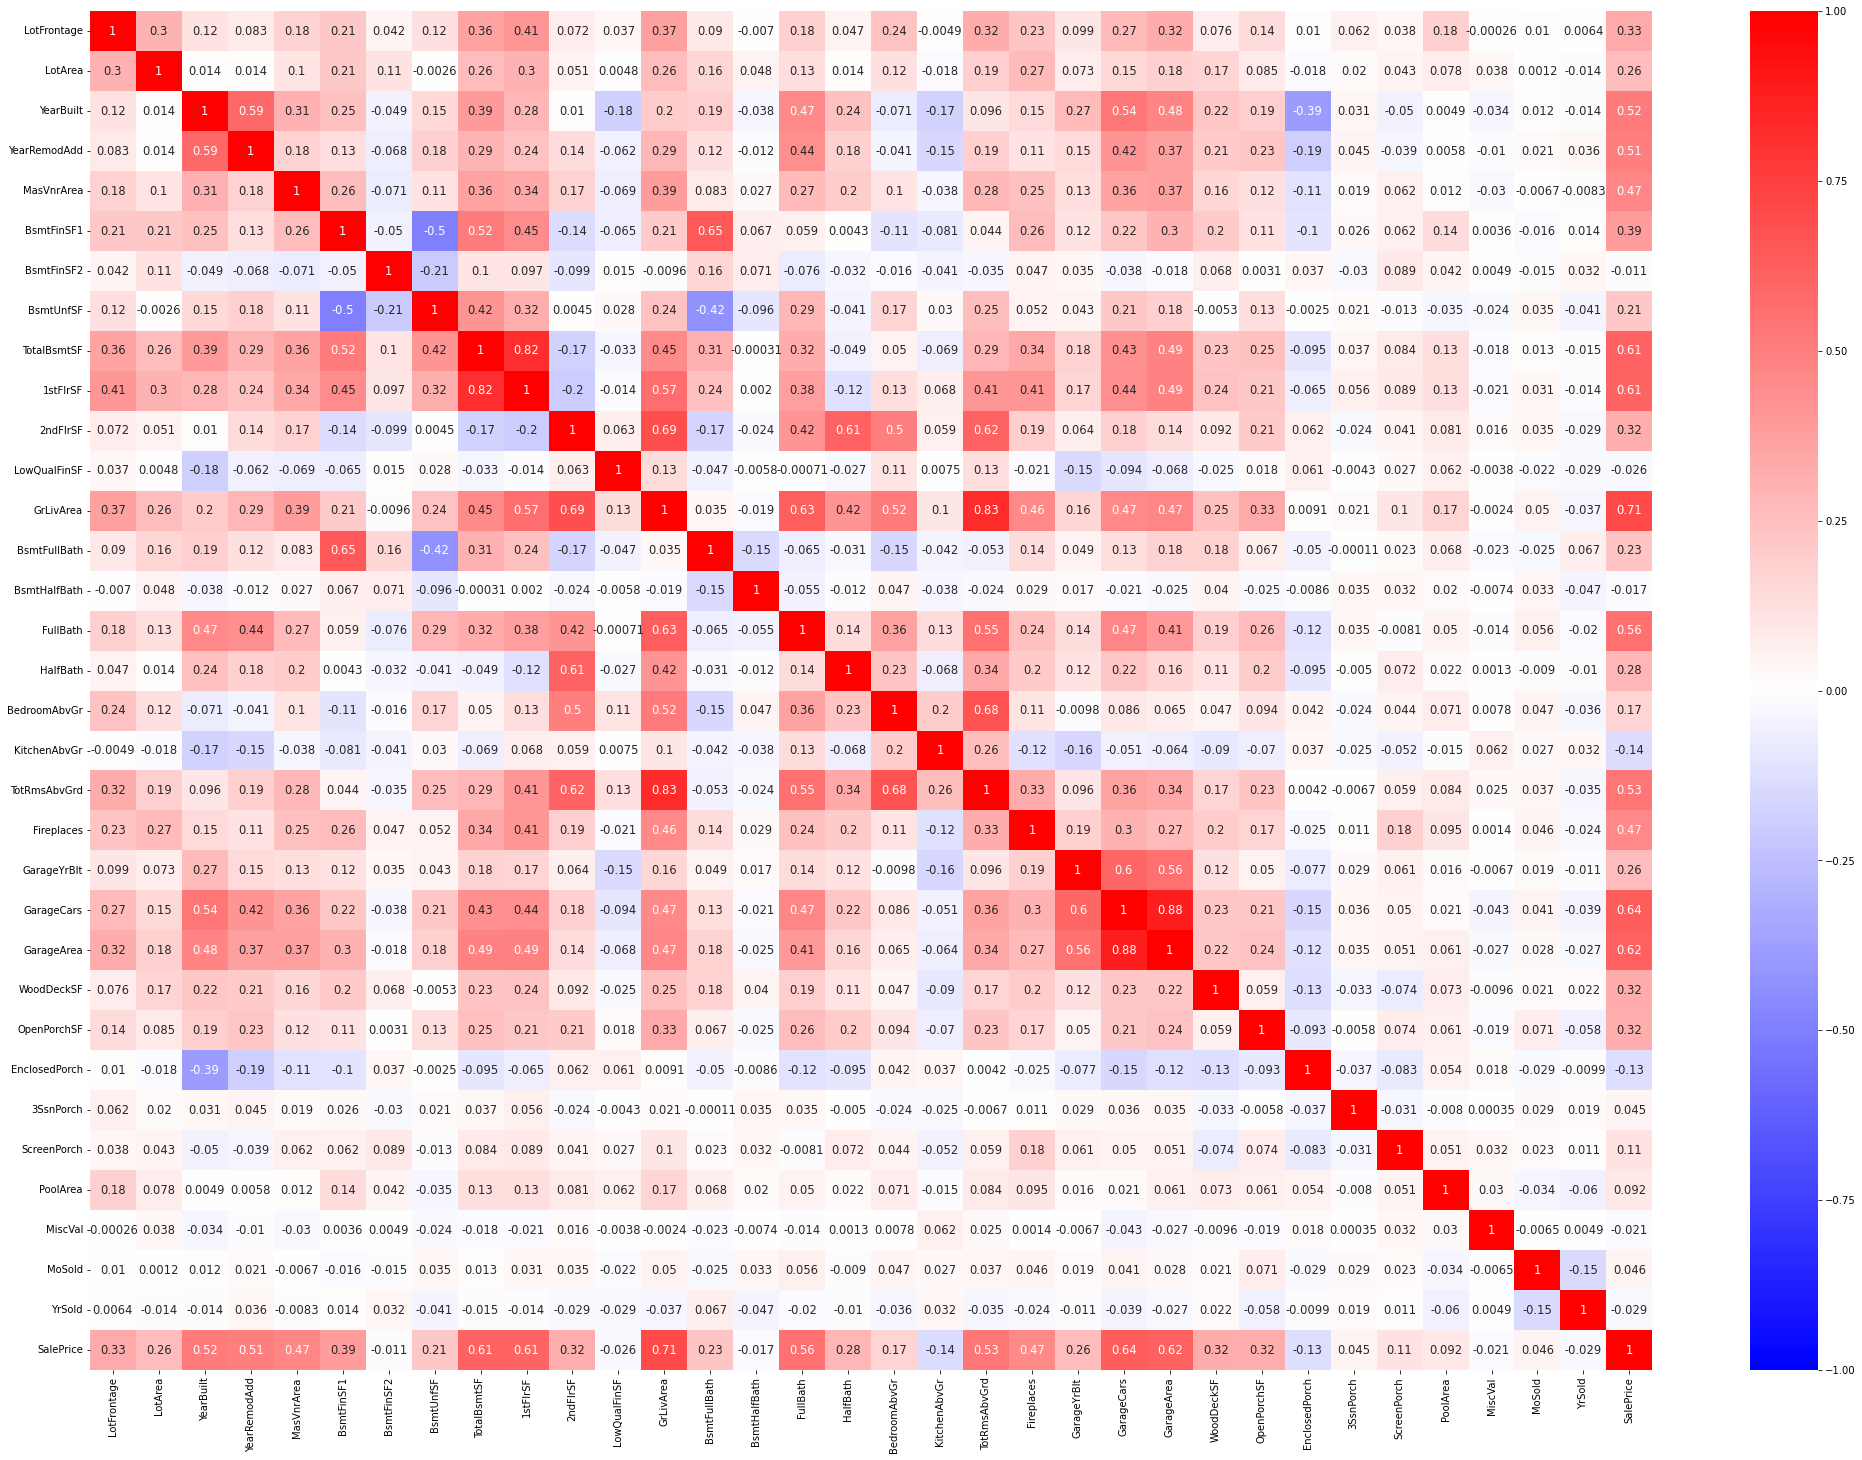

In [27]:
plt.figure(figsize =(35,25))
sns.heatmap(cormat, annot =True, vmax=1, vmin=-1, cmap='bwr', annot_kws = {'Size':11.5})
plt.show()

**Label Encoding for categorical variables**

In [28]:
LE = LabelEncoder()

for feature in data.select_dtypes(include=object).columns.values:
    data[feature] = LE.fit_transform(data[feature])

**To Standardize the independent variables, we'll use MinMax scalar or Standard Scalar**

In [29]:
feature_scaling = [col for col in data.columns if col not in ['SalePrice']]
norm= MinMaxScaler()
data[feature_scaling] = norm.fit_transform(data[feature_scaling])

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.357143,0.75,0.150685,0.033420,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.949275,0.883333,0.2,0.142857,0.857143,0.866667,0.333333,0.12250,0.666667,1.0,0.4,0.50,0.75,0.75,0.333333,0.125089,0.833333,0.0,0.064212,0.140098,0.2,0.0,1.0,1.0,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.6,0.166667,0.996517,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.0,0.090909,0.50,1.0,0.8,208500
1,0.000000,0.75,0.202055,0.038795,1.0,0.5,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.555556,0.875,0.753623,0.433333,0.2,0.142857,0.571429,0.533333,0.666667,0.00000,1.000000,1.0,0.2,0.50,0.75,0.25,0.000000,0.173281,0.833333,0.0,0.121575,0.206547,0.2,0.0,1.0,1.0,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.166667,0.983085,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.0,0.363636,0.25,1.0,0.8,181500
2,0.357143,0.75,0.160959,0.046507,1.0,0.5,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.934783,0.866667,0.2,0.142857,0.857143,0.866667,0.333333,0.10125,0.666667,1.0,0.4,0.50,0.75,0.50,0.333333,0.086109,0.833333,0.0,0.185788,0.150573,0.2,0.0,1.0,1.0,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.166667,0.995522,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.0,0.727273,0.50,1.0,0.8,223500
3,0.428571,0.75,0.133562,0.038561,1.0,0.5,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.311594,0.333333,0.2,0.142857,0.928571,1.000000,0.666667,0.00000,1.000000,1.0,0.0,0.75,0.25,0.75,0.000000,0.038271,0.833333,0.0,0.231164,0.123732,0.2,0.5,1.0,1.0,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.833333,0.994030,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,1.0,0.25,0.0,0.090909,0.00,1.0,0.0,140000
4,0.357143,0.75,0.215753,0.060576,1.0,0.5,0.0,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,0.0,0.714286,0.777778,0.500,0.927536,0.833333,0.2,0.142857,0.857143,0.866667,0.333333,0.21875,0.666667,1.0,0.4,0.50,0.75,0.00,0.333333,0.116052,0.833333,0.0,0.209760,0.187398,0.2,0.0,1.0,1.0,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.166667,0.995025,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.0,1.000000,0.50,1.0,0.8,250000


**Check for Multicolinearity**

In [30]:
def calculate_vif(x):
    vif= pd.DataFrame()
    vif['features']= x.columns
    vif['VIF_Values']= [vifm(x.values,i) for i in range(x.shape[1])]
    return(vif)
calculate_vif(data)

,features,VIF_Values
0,MSSubClass,11.784369
1,MSZoning,35.816993
2,LotFrontage,10.317484
3,LotArea,3.079414
4,Street,272.034651
5,Alley,21.641024
6,LotShape,3.636419
7,LandContour,21.513538
8,Utilities,1.101139
9,LotConfig,5.105163


In [31]:
x_ind= data.drop('SalePrice', axis=1)
y_dep= data.SalePrice

In [32]:
model= sm.OLS(y_dep,x_ind)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              731.8
Date:                Mon, 11 Apr 2022   Prob (F-statistic):                        0.00
Time:                        15:42:17   Log-Likelihood:                         -17151.
No. Observations:                1460   AIC:                                  3.446e+04
Df Residuals:                    1383   BIC:                                  3.486e+04
Df Model:                          77                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass    -1.674e+04   6696.989     -2.500      0.013   -2.99e+04   -3607.223
MSZoning       -590.2668   6362.645     -0.093      0.926   -1.31e+04    1.19e+04
LotFrontage   -3.615e+04   1.44e+04     -2.517      0.012   -6.43e+04   -7980.421
LotArea        8.611e+04   2.26e+04      3.808      0.000    4.18e+04     1.3e+05
Street         5.131e+04   1.35e+04      3.795      0.000    2.48e+04    7.78e+04
Alley          7926.3735   7463.572      1.062      0.288   -6714.773    2.26e+04
LotShape      -2358.5617   1959.576     -1.204      0.229   -6202.624    1485.501
LandContour    1.227e+04   3978.802      3.083      0.002    4459.999    2.01e+04
Utilities     -5.405e+04   3.29e+04     -1.641      0.101   -1.19e+05    1.06e+04
LotConfig       348.1461   2168.476      0.161      0.872   -3905.711    4602.004
LandSlope       1.51e+04   7562.078      1.997      0.046     263.626    2.99e+04
Neighborhood   9870.4740   3691.633      2.674      0.008    2628.669    1.71e+04
Condition1    -3029.6699   8039.227     -0.377      0.706   -1.88e+04    1.27e+04
Condition2    -4.419e+04    2.3e+04     -1.919      0.055   -8.94e+04     987.478
BldgType      -1.059e+04   5961.746     -1.776      0.076   -2.23e+04    1108.436
HouseStyle    -7020.7810   4679.880     -1.500      0.134   -1.62e+04    2159.649
OverallQual    1.026e+05   1.06e+04      9.708      0.000    8.19e+04    1.23e+05
OverallCond    4.498e+04   8279.651      5.433      0.000    2.87e+04    6.12e+04
YearBuilt      3.408e+04   1.01e+04      3.368      0.001    1.42e+04    5.39e+04
YearRemodAdd  -1276.5893   3977.512     -0.321      0.748   -9079.198    6526.020
RoofStyle      1.095e+04   5580.307      1.962      0.050       3.873    2.19e+04
RoofMatl       3.344e+04   1.05e+04      3.195      0.001    1.29e+04     5.4e+04
Exterior1st   -1.231e+04   7222.861     -1.704      0.089   -2.65e+04    1859.317
Exterior2nd    6124.5841   7011.537      0.874      0.383   -7629.813    1.99e+04
MasVnrType     1.369e+04   4746.062      2.885      0.004    4383.500     2.3e+04
MasVnrArea     4.708e+04   9707.759      4.850      0.000     2.8e+04    6.61e+04
ExterQual     -2.601e+04   5824.652     -4.465      0.000   -3.74e+04   -1.46e+04
ExterCond      4480.9398   4982.992      0.899      0.369   -5294.099    1.43e+04
Foundation     6493.0406   8253.988      0.787      0.432   -9698.649    2.27e+04
BsmtQual      -2.954e+04   5650.858     -5.228      0.000   -4.06e+04   -1.85e+04
BsmtCond       1.087e+04   5363.206      2.026      0.043     344.972    2.14e+04
BsmtExposure  -1.355e+04   3561.885     -3.805      0.000   -2.05e+04   -6565.886
BsmtFinType1  -2727.2527   3705.060     -0.736      0.462   -9995.397    4540.892
BsmtFinSF1     2.261e+04   1.42e

# Linear Regression

**Importing train_test split and K-Fold techniques.**

In [33]:
k_fold = KFold(10)

x_train,x_test,y_train,y_test=train_test_split(x_ind, y_dep, train_size=0.8, random_state=1)

model=LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([208422.01188557, 175010.50968059,  93030.38509982,  87106.74701423,
       133665.34063886, 321171.38690371, 295137.44004061, 149787.95364036,
       228059.411338  , 251958.7707722 , 201559.8319456 ,  68366.76461943,
       205468.10508689, 374325.21248886, 246430.79996183, 117430.80987448,
        90428.99040575, 106596.77681966, 275548.78734685, 108019.20435967,
       115362.64071284, 119524.64497015, 219562.68368605, 363201.6043836 ,
       103120.58290985, 222939.71856152, 146248.65979872, 175844.62190746,
       414175.11207089, 113966.69482312, 143560.01667957, 125654.04603376,
       120689.09103637,  86872.01375646, 151577.37391134, 346525.90150042,
       131084.09612096,  98833.85919169, 259350.23917823, 104675.7888386 ,
       132504.63640485, 146097.39653672, 126180.22760428, 128757.06520598,
       154527.40580563, 185943.07235672, 127007.72725493, 209587.78350924,
       247883.6299977 , 277693.83231497,  87738.83106704, 293772.95516036,
        94582.00026894, 2

In [34]:
print(np.round(model.score(x_test,y_test),3))
print(np.round(model.score(x_train,y_train),3))

0.823
0.85


In [35]:
model_lin_kfold=LinearRegression()
results_lin=cross_val_score(model_lin_kfold,x_ind,y_dep,scoring='r2',cv=k_fold)
model_lin_kfold.fit(x_train,y_train)
lin_predict_kfold=model_lin_kfold.predict(x_test)
print(results_lin)
print(np.mean(results_lin))

[ 8.83492184e-01  8.44769202e-01  8.94204210e-01  7.43691761e-01
  8.60060457e-01  8.65777375e-01 -8.84441797e+21  8.50912059e-01
  4.73424125e-01  7.65196640e-01]
-8.844417966601238e+20


In [36]:
mean_sqr_lr = mean_squared_error(y_test,y_pred)
root_mean_lr = np.sqrt(mean_sqr_lr)
np.round(root_mean_lr,3)

NameError: name 'mean_squared_error' is not defined

In [ ]:
res= y_test - y_pred

st.probplot(res,dist='norm',plot=plt)

In [ ]:
sns.distplot(res)

In [ ]:
f_com=pd.DataFrame({'Actual':y_test, 'Machine Predicted': y_pred})
com_g=f_com.head(25)
com_g.plot(kind='bar', figsize=(15,5));

# Ridge Regression

In [ ]:
ridge_model=Ridge(alpha=85, max_iter=100)
ridge_model.fit(x_train, y_train)
ridge_predict = ridge_model.predict(x_test)
print(np.round(ridge_model.score(x_test,y_test),3))
print(np.round(ridge_model.score(x_train,y_train),3))

In [ ]:
#performing K-Fold cross validation.
ridge_model_kfold=Ridge(alpha=85,max_iter=100)
results=cross_val_score(ridge_model_kfold,x_ind,y_dep,cv=k_fold)
ridge_model_kfold.fit(x_train,y_train)
ridge_predict_kfold=ridge_model_kfold.predict(x_test)
print(results)
print(np.mean(results))

In [ ]:
#Rmse using train test split

mean_sqr_ridge=mean_squared_error(y_test,ridge_predict)
root_mean_ridge=np.sqrt(mean_sqr_ridge)
print(root_mean_ridge)

#Rmse using k-fold
mean_sqr_ridge_kfold=mean_squared_error(y_test,ridge_predict_kfold)
root_mean_ridge_kfold=np.sqrt(mean_sqr_ridge_kfold)
print(root_mean_ridge_kfold)

In [ ]:
#normality check
st.probplot(y_test-ridge_predict,dist="norm",plot=plt)

# Lasso regression

In [ ]:
#importing lasso regression and assigning alpha value as 85 after multiple check with various alpha values.
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha =85, max_iter = 100)
lasso_model.fit(x_train, y_train)
lasso_predict=lasso_model.predict(x_test)

print(np.round(lasso_model.score(x_test,y_test),3))
print(np.round(lasso_model.score(x_test,y_test),3))

In [ ]:
#performing K-Fold cross validation.
lasso_model_kfold=Lasso(alpha =85, max_iter = 100)
results_lasso=cross_val_score(lasso_model_kfold,x_ind,y_dep,cv=k_fold)
lasso_model_kfold.fit(x_train,y_train)
lasso_predict_kfold=lasso_model_kfold.predict(x_test)
print(results_lasso)
print(np.mean(results_lasso))

In [ ]:
#Rmse using train test split model.
mean_sqr_lasso=mean_squared_error(y_test,lasso_predict)
root_mean_lasso=np.sqrt(mean_sqr_lasso)
print(root_mean_lasso)

#Rmse using k-fold model.
mean_sqr_lasso_kfold=mean_squared_error(y_test,lasso_predict_kfold)
root_mean_lasso_kfold=np.sqrt(mean_sqr_lasso_kfold)
print(root_mean_lasso_kfold)

In [ ]:
# normality check
st.probplot(y_test-lasso_predict,dist="norm",plot=plt)

# SGD regression

In [ ]:
#performing SGD regression

model_sgd=SGDRegressor()
model_sgd.fit(x_train,y_train)
sgd_predict=model_sgd.predict(x_test)

#accuracy of test data
print(np.round(model_sgd.score(x_test,y_test),3))
print(np.round(model_sgd.score(x_train, y_train),3))

In [ ]:
#k-fold on SGD model
model_sgd_kfold=SGDRegressor()
results_sgd=cross_val_score(model_sgd_kfold,x_ind,y_dep,cv=k_fold)
model_sgd_kfold.fit(x_train,y_train)
sgd_predict_kfold=model_sgd_kfold.predict(x_test)
print(results_sgd)
print(np.mean(results_sgd))

In [ ]:
#Rmse using train test split model.
mean_sqr_sgd=mean_squared_error(y_test,sgd_predict)
root_mean_sgd=np.sqrt(mean_sqr_sgd)
print(root_mean_sgd)

#Rmse using k-fold model.
mean_sqr_sgd_kfold=mean_squared_error(y_test,sgd_predict_kfold)
root_mean_sgd_kfold=np.sqrt(mean_sqr_sgd_kfold)
print(root_mean_sgd_kfold)

In [ ]:
#normality check.
st.probplot(y_test-sgd_predict,dist="norm",plot=plt)

# Random Forest 

In [ ]:
#importing random forest regressor
model_rf=RandomForestRegressor(random_state=2)
model_rf=model_rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)

print(np.round(model_rf.score(x_test,y_test),3))
print(np.round(model_rf.score(x_train,y_train),3))

In [ ]:
#Hyper parameter tuning

parameters={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
RF=RandomizedSearchCV(RandomForestRegressor(),param_distributions=parameters,cv=5)
RF.fit(x_train,y_train)
RF.best_estimator_

In [ ]:
model_af_rfht=RandomForestRegressor(bootstrap=False, max_depth=70, max_features='sqrt',min_samples_leaf=2, min_samples_split=5,n_estimators=800)
y_pred_afht=model_af_rfht.fit(x_train,y_train).predict(x_test)
y_pred_hyp=RF.predict(x_test)
print(np.round(model_af_rfht.score(x_test,y_test),3))

In [ ]:
#Rmse before hyperparameter.
mean_sqr_rf=mean_squared_error(y_test,y_pred_rf)
root_mean_rf=np.sqrt(mean_sqr_rf)
print(root_mean_rf)

#Rmse after hyperparameter.
mean_sqr_rfhp=mean_squared_error(y_test,y_pred_hyp)
root_mean_rfhp=np.sqrt(mean_sqr_rfhp)
root_mean_rfhp

# Gradient boosting technique

In [ ]:
#performing gradient boosting technique.

model_GB=GradientBoostingRegressor()
model_GB.fit(x_train,y_train)
y_pred_GB=model_GB.predict(x_test)

print(np.round(model_GB.score(x_test,y_test),3))
print(np.round(model_GB.score(x_test,y_test),3))

In [ ]:
#performing k-fold  
model_GB_kfold=GradientBoostingRegressor()
results_GB=cross_val_score(model_GB_kfold,x_ind,y_dep,cv=k_fold)
model_GB_kfold.fit(x_train,y_train)
y_pred_GB_kfold=model_GB_kfold.predict(x_test)
print(results_GB)
print(np.mean(results_GB))

In [ ]:
#RMSE by using train test split technique.
mean_sqr_GB=mean_squared_error(y_test,y_pred_GB)
root_mean_GB=np.sqrt(mean_sqr_GB)
print(root_mean_GB)

#RMSE by using K-fold technique.
mean_sqr_GB1=mean_squared_error(y_test,y_pred_GB_kfold)
root_mean_GB1=np.sqrt(mean_sqr_GB1)
print(root_mean_GB1)

In [ ]:
#normality check
st.probplot(y_test-y_pred_GB_kfold,dist="norm",plot=plt)

In [ ]:
#relation b/w actual and predicted in bar graph
f_com_GB=pd.DataFrame({"Actual":y_test,"Machine_predicted":y_pred_GB_kfold})
com_g_GB=f_com_GB.head(25)
com_g_GB.plot(kind="bar",figsize=(15,5));

# Ada boosting technique

In [ ]:
model_ada=AdaBoostRegressor()
model_ada.fit(x_train,y_train)
y_pred_ada=model_ada.predict(x_test)

print(np.round(model_ada.score(x_test,y_test),3))
print(np.round(model_ada.score(x_train,y_train),3))

In [ ]:
model_ada_kfold=AdaBoostRegressor()
results_ada=cross_val_score(model_ada_kfold,x_ind,y_dep,cv=k_fold)
model_ada_kfold.fit(x_train,y_train)
y_pred_ada_kfold=model_ada_kfold.predict(x_test)
print(results_ada)
print(np.mean(results_ada))

In [ ]:
#Rmse for train test split model
mean_sqr_ada=mean_squared_error(y_test,y_pred_ada)
root_mean_ada=np.sqrt(mean_sqr_ada)
print(root_mean_ada)

#Rmse for k-fold model
mean_sqr_ada1=mean_squared_error(y_test,y_pred_ada_kfold)
root_mean_ada1=np.sqrt(mean_sqr_ada1)
print(root_mean_ada1)

In [ ]:
#normality check
st.probplot(y_test-y_pred_ada_kfold,dist="norm",plot=plt)

# Conclusion

In [ ]:
# Algorithm	           Accuracy      Rmse

# Linear Regression     82.3%       3556 er
# Ridge Regression      75%         42150 er
# Lasso Regression      84%         33990 er
# SGD Regression        83%         35017 er
# Random forest         89%         27906 er
# Gradient Boosting     91%         25597 er
# ADA Boosting          85%         32547 er